<a href="https://colab.research.google.com/github/Isanjalee/fyp/blob/weather_forecasting/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Predicting the number of rides according to weather condition**

In [3]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/FYP - DATASET/uberdata.csv'
weather_data = pd.read_csv(file_path)

In [115]:
weather_data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,6/30/2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,6/30/2015 23:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [116]:
missing_values = weather_data.isna().sum()
print(missing_values)

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64


In [117]:
cleaned_weather_data = weather_data.dropna(axis=0)

##  Cleaned_DataSet

In [118]:
cleaned_weather_data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,6/30/2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [119]:
import pandas as pd
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(cleaned_weather_data.select_dtypes(include=[np.number])))
threshold = 3
outlier_mask = (z_scores > threshold).any(axis=1)
cleaned_weather_data_no_outliers = cleaned_weather_data[~outlier_mask]
cleaned_weather_data_no_outliers.to_csv('cleaned_weather_data_no_outliers.csv', index=False)


cleaned_weather_data_no_outliers

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,1/1/2015 1:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29094,6/30/2015 23:00,Bronx,67,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29095,6/30/2015 23:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


## Z-score standard normal distribution

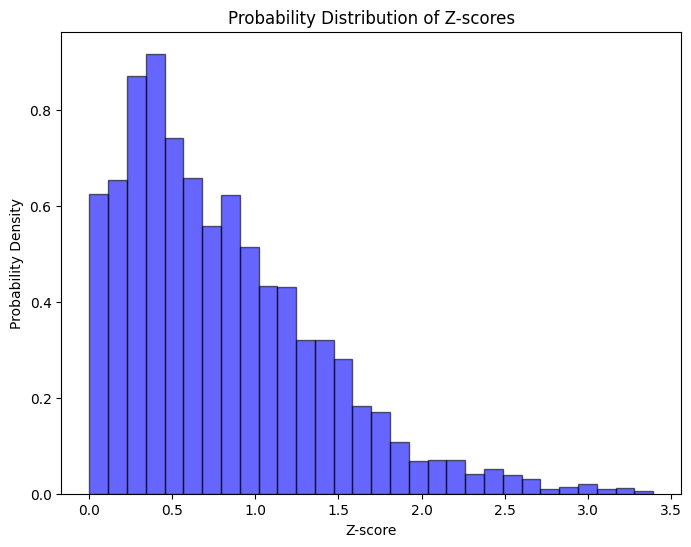

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


numeric_columns = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
z_scores = np.abs(stats.zscore(cleaned_weather_data[numeric_columns[5]]))

threshold = 3

cleaned_data_no_outliers = cleaned_weather_data[(z_scores < threshold)]


# Option 1: Create a histogram of Z-scores
plt.figure(figsize=(8, 6))
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Z-scores')
plt.show()










## Outlier Detection Using Z-scores

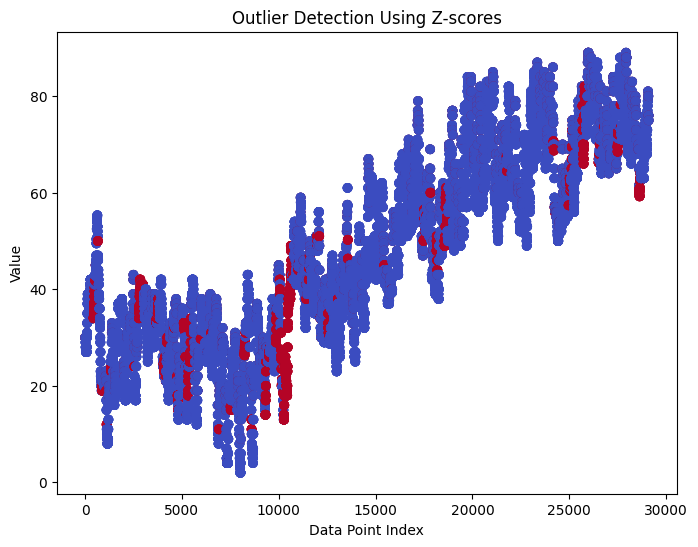

In [121]:
numeric_columns = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Calculate Z-Scores only for numeric columns
z_scores = np.abs(stats.zscore(cleaned_weather_data[numeric_columns]))

# Set a threshold for outlier detection
threshold = 3  # You can adjust this value as needed

# Identify outliers for each numeric column
outlier_mask = z_scores > threshold

# Combine outlier masks across all columns
combined_outlier_mask = np.any(outlier_mask, axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(cleaned_weather_data.index, cleaned_weather_data[numeric_columns[3]], c=combined_outlier_mask, cmap='coolwarm')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Outlier Detection Using Z-scores')
plt.show()

## Identifying Categorical Values

In [122]:
cleaned_weather_data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,6/30/2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [124]:
cleaned_weather_data['hday'] = cleaned_weather_data['hday'].map({'Y': 1, 'N': 0})

<ipython-input-124-45f25c13fef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_weather_data['hday'] = cleaned_weather_data['hday'].map({'Y': 1, 'N': 0})


In [125]:
cleaned_weather_data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0
29097,6/30/2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0


In [126]:
# Get unique values in the 'borough' column
unique_boroughs = cleaned_weather_data['borough'].unique()

# Print the unique boroughs
print(unique_boroughs)


['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island']


In [127]:
# Define a mapping dictionary for 'borough'
borough_mapping = {
    'Bronx': 1,
    'Brooklyn': 2,
    'EWR': 3,
    'Manhattan': 4,
    'Queens': 5,
    'Staten Island': 6
}

# Map the 'borough' column using the mapping dictionary
cleaned_weather_data1 = cleaned_weather_data.copy()
cleaned_weather_data1['borough_numeric'] = cleaned_weather_data['borough'].map(borough_mapping)


In [128]:
cleaned_weather_data1

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,borough_numeric
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,2
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,3
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,4
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,Brooklyn,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,2
29096,6/30/2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,3
29097,6/30/2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,4
29098,6/30/2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,5


In [129]:
# Create a new DataFrame 'cleaned_weather_data1' without the 'borough' column
#cleaned_weather_data1 = cleaned_weather_data.drop(columns=['borough'])

# Create a separate DataFrame with 'borough' and 'borough_numeric'
borough_mapping = {
    'Bronx': 1,
    'Brooklyn': 2,
    'EWR': 3,
    'Manhattan': 4,
    'Queens': 5,
    'Staten Island': 6
}

borough_df = pd.DataFrame({'borough': list(borough_mapping.keys()), 'borough_numeric': list(borough_mapping.values())})
cleaned_weather_data1.drop(columns=['borough'], inplace=True)

# Print the first few rows of 'cleaned_weather_data1'
print(cleaned_weather_data1.head())

# Print the 'borough_df' DataFrame borough_numeric + borough
print(borough_df)


       pickup_dt  pickups  spd   vsb  temp  dewp     slp  pcp01  pcp06  pcp24  \
0  1/1/2015 1:00      152  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
1  1/1/2015 1:00     1519  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
2  1/1/2015 1:00        0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
3  1/1/2015 1:00     5258  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   
4  1/1/2015 1:00      405  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0   

    sd  hday  borough_numeric  
0  0.0     1                1  
1  0.0     1                2  
2  0.0     1                3  
3  0.0     1                4  
4  0.0     1                5  
         borough  borough_numeric
0          Bronx                1
1       Brooklyn                2
2            EWR                3
3      Manhattan                4
4         Queens                5
5  Staten Island                6


In [130]:
cleaned_weather_data1

,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,borough_numeric
0,1/1/2015 1:00,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1
1,1/1/2015 1:00,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,2
2,1/1/2015 1:00,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,3
3,1/1/2015 1:00,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,4
4,1/1/2015 1:00,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,2
29096,6/30/2015 23:00,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,3
29097,6/30/2015 23:00,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,4
29098,6/30/2015 23:00,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,5


## Normalizing dataset

In [133]:
import numpy as np
normalized_data_set = cleaned_weather_data1.copy()
# Assuming your cleaned data is stored in a numpy array called 'cleaned_data'
# Min-Max Scaling
columns_to_normalize = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'borough_numeric']

# Min-Max Scaling
min_vals = normalized_data_set[columns_to_normalize].min()
max_vals = normalized_data_set[columns_to_normalize].max()
normalized_data_minmax = (normalized_data_set[columns_to_normalize] - min_vals) / (max_vals - min_vals)

# Z-score Normalization
mean_vals = normalized_data_set[columns_to_normalize].mean()
std_devs = normalized_data_set[columns_to_normalize].std()
normalized_data_zscore = (normalized_data_set[columns_to_normalize] - mean_vals) / std_devs

# Print the normalized data
print("Normalized Data (Min-Max Scaling):")
print(normalized_data_minmax)

print("\nNormalized Data (Z-score Normalization):")
print(normalized_data_zscore)


Normalized Data (Min-Max Scaling):
            spd  vsb      temp      dewp       slp  pcp01  pcp06  pcp24   sd  \
0      0.238095  1.0  0.321839  0.258427  0.617308    0.0    0.0    0.0  0.0   
1      0.238095  1.0  0.321839  0.258427  0.617308    0.0    0.0    0.0  0.0   
2      0.238095  1.0  0.321839  0.258427  0.617308    0.0    0.0    0.0  0.0   
3      0.238095  1.0  0.321839  0.258427  0.617308    0.0    0.0    0.0  0.0   
4      0.238095  1.0  0.321839  0.258427  0.617308    0.0    0.0    0.0  0.0   
...         ...  ...       ...       ...       ...    ...    ...    ...  ...   
29095  0.333333  1.0  0.839080  0.910112  0.392308    0.0    0.0    0.0  0.0   
29096  0.333333  1.0  0.839080  0.910112  0.392308    0.0    0.0    0.0  0.0   
29097  0.333333  1.0  0.839080  0.910112  0.392308    0.0    0.0    0.0  0.0   
29098  0.333333  1.0  0.839080  0.910112  0.392308    0.0    0.0    0.0  0.0   
29099  0.333333  1.0  0.839080  0.910112  0.392308    0.0    0.0    0.0  0.0   

    

In [132]:
normalized_data_set

,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,borough_numeric
0,1/1/2015 1:00,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1
1,1/1/2015 1:00,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,2
2,1/1/2015 1:00,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,3
3,1/1/2015 1:00,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,4
4,1/1/2015 1:00,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,6/30/2015 23:00,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,2
29096,6/30/2015 23:00,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,3
29097,6/30/2015 23:00,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,4
29098,6/30/2015 23:00,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,0,5


## Identifying correlation between attributes

<ipython-input-135-f4efea3de366>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = normalized_data_set.corr()


Correlation Matrix:
                  pickups           spd           vsb          temp  \
pickups          1.000000  9.741013e-03 -8.428765e-03  6.369218e-02   
spd              0.009741  1.000000e+00  8.617723e-02 -2.961261e-01   
vsb             -0.008429  8.617723e-02  1.000000e+00  2.521425e-02   
temp             0.063692 -2.961261e-01  2.521425e-02  1.000000e+00   
dewp             0.040082 -3.216062e-01 -2.312943e-01  8.965445e-01   
slp             -0.015708 -9.276112e-02  1.670391e-01 -2.245367e-01   
pcp01            0.005007 -3.565008e-04 -4.884073e-01 -1.334334e-02   
pcp06           -0.002821  1.666844e-02 -1.183456e-01 -3.729465e-02   
pcp24           -0.022935 -1.041249e-02  8.946800e-04 -1.440785e-02   
sd              -0.009676  9.704054e-02 -4.783373e-02 -5.455576e-01   
hday            -0.011248 -6.356239e-03  2.206122e-02 -2.776446e-02   
borough_numeric  0.068994  3.080692e-16  9.627073e-17 -1.247573e-15   

                         dewp           slp         pcp0

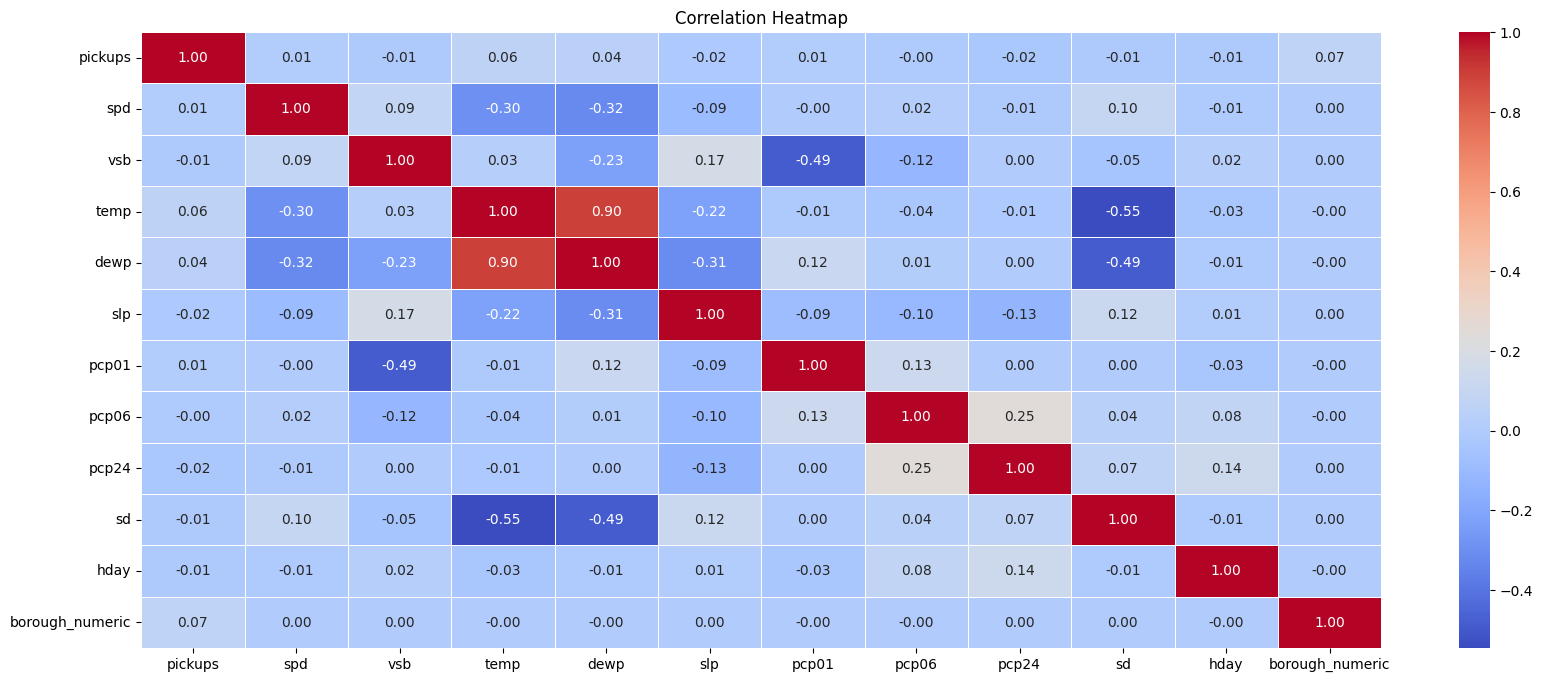

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = normalized_data_set.corr()


print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [136]:
df = normalized_data_set.copy()

df.drop('dewp', axis=1, inplace=True)
print("Updated DataFrame:")
print(df)

Updated DataFrame:
             pickup_dt  pickups  spd   vsb  temp     slp  pcp01  pcp06  pcp24  \
0        1/1/2015 1:00      152  5.0  10.0  30.0  1023.5    0.0    0.0    0.0   
1        1/1/2015 1:00     1519  5.0  10.0  30.0  1023.5    0.0    0.0    0.0   
2        1/1/2015 1:00        0  5.0  10.0  30.0  1023.5    0.0    0.0    0.0   
3        1/1/2015 1:00     5258  5.0  10.0  30.0  1023.5    0.0    0.0    0.0   
4        1/1/2015 1:00      405  5.0  10.0  30.0  1023.5    0.0    0.0    0.0   
...                ...      ...  ...   ...   ...     ...    ...    ...    ...   
29095  6/30/2015 23:00      990  7.0  10.0  75.0  1011.8    0.0    0.0    0.0   
29096  6/30/2015 23:00        0  7.0  10.0  75.0  1011.8    0.0    0.0    0.0   
29097  6/30/2015 23:00     3828  7.0  10.0  75.0  1011.8    0.0    0.0    0.0   
29098  6/30/2015 23:00      580  7.0  10.0  75.0  1011.8    0.0    0.0    0.0   
29099  6/30/2015 23:00        0  7.0  10.0  75.0  1011.8    0.0    0.0    0.0   

        

<ipython-input-137-178b6f8391f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                  pickups           spd           vsb          temp  \
pickups          1.000000  9.741013e-03 -8.428765e-03  6.369218e-02   
spd              0.009741  1.000000e+00  8.617723e-02 -2.961261e-01   
vsb             -0.008429  8.617723e-02  1.000000e+00  2.521425e-02   
temp             0.063692 -2.961261e-01  2.521425e-02  1.000000e+00   
slp             -0.015708 -9.276112e-02  1.670391e-01 -2.245367e-01   
pcp01            0.005007 -3.565008e-04 -4.884073e-01 -1.334334e-02   
pcp06           -0.002821  1.666844e-02 -1.183456e-01 -3.729465e-02   
pcp24           -0.022935 -1.041249e-02  8.946800e-04 -1.440785e-02   
sd              -0.009676  9.704054e-02 -4.783373e-02 -5.455576e-01   
hday            -0.011248 -6.356239e-03  2.206122e-02 -2.776446e-02   
borough_numeric  0.068994  3.080692e-16  9.627073e-17 -1.247573e-15   

                          slp         pcp01         pcp06         pcp24  \
pickups         -1.570775e-02  5.006866e-03 -2.82102

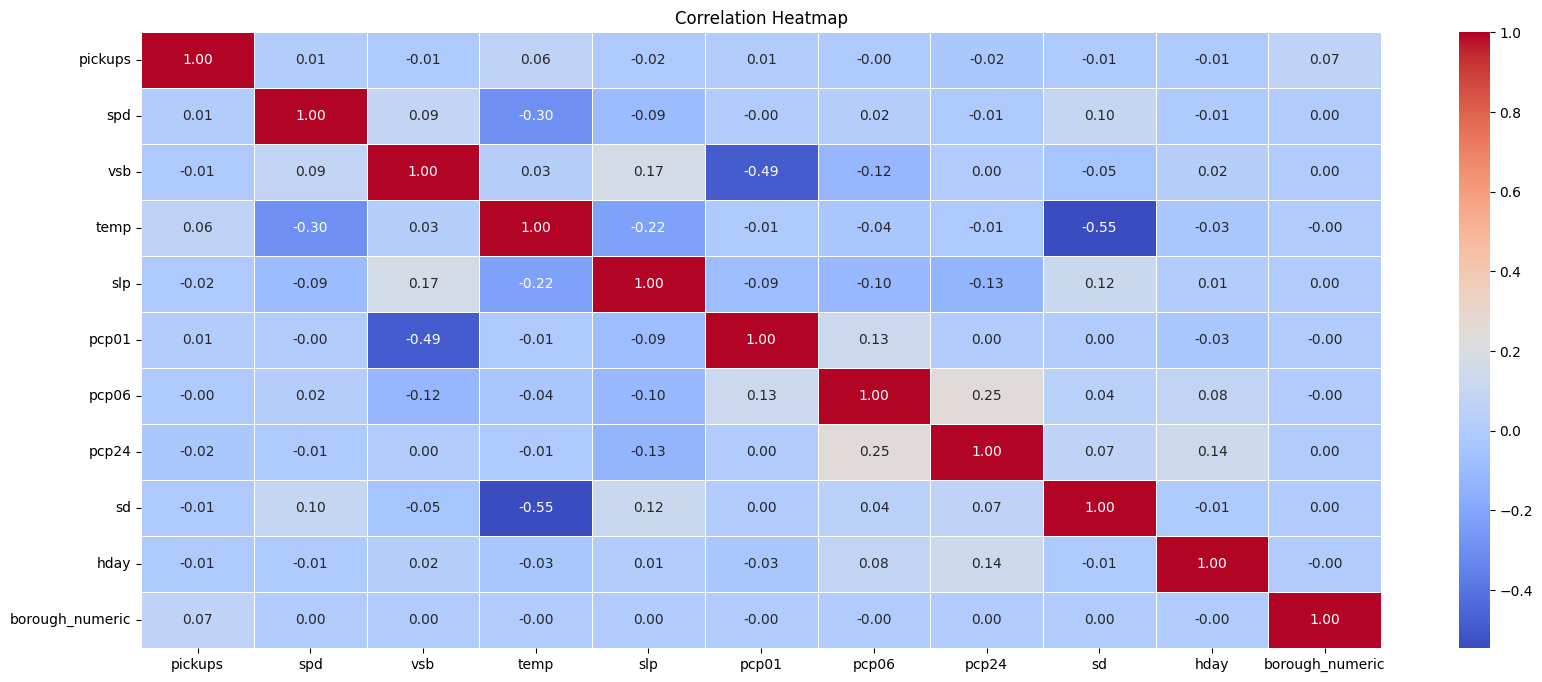

In [137]:
correlation_matrix = df.corr()


print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Splitting date time

In [138]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

df['day_of_month'] = df['pickup_dt'].dt.day
df['hour_of_day'] = df['pickup_dt'].dt.hour
df['day_of_week'] = df['pickup_dt'].dt.dayofweek

df.drop('pickup_dt', axis=1, inplace=True)

print("Updated DataFrame:")
print(df)

Updated DataFrame:
       pickups  spd   vsb  temp     slp  pcp01  pcp06  pcp24   sd  hday  \
0          152  5.0  10.0  30.0  1023.5    0.0    0.0    0.0  0.0     1   
1         1519  5.0  10.0  30.0  1023.5    0.0    0.0    0.0  0.0     1   
2            0  5.0  10.0  30.0  1023.5    0.0    0.0    0.0  0.0     1   
3         5258  5.0  10.0  30.0  1023.5    0.0    0.0    0.0  0.0     1   
4          405  5.0  10.0  30.0  1023.5    0.0    0.0    0.0  0.0     1   
...        ...  ...   ...   ...     ...    ...    ...    ...  ...   ...   
29095      990  7.0  10.0  75.0  1011.8    0.0    0.0    0.0  0.0     0   
29096        0  7.0  10.0  75.0  1011.8    0.0    0.0    0.0  0.0     0   
29097     3828  7.0  10.0  75.0  1011.8    0.0    0.0    0.0  0.0     0   
29098      580  7.0  10.0  75.0  1011.8    0.0    0.0    0.0  0.0     0   
29099        0  7.0  10.0  75.0  1011.8    0.0    0.0    0.0  0.0     0   

       borough_numeric  day_of_month  hour_of_day  day_of_week  
0              

## Devide DataSet

In [140]:
from sklearn.model_selection import train_test_split

X = df.drop('pickups', axis=1)  # Features (input variables)
y = df['pickups']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (18240, 13) (18240,)
Test data shape (X_test, y_test): (7818, 13) (7818,)


## Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 60338.05832693783
R-squared (R2) Score: 0.9448336210340605


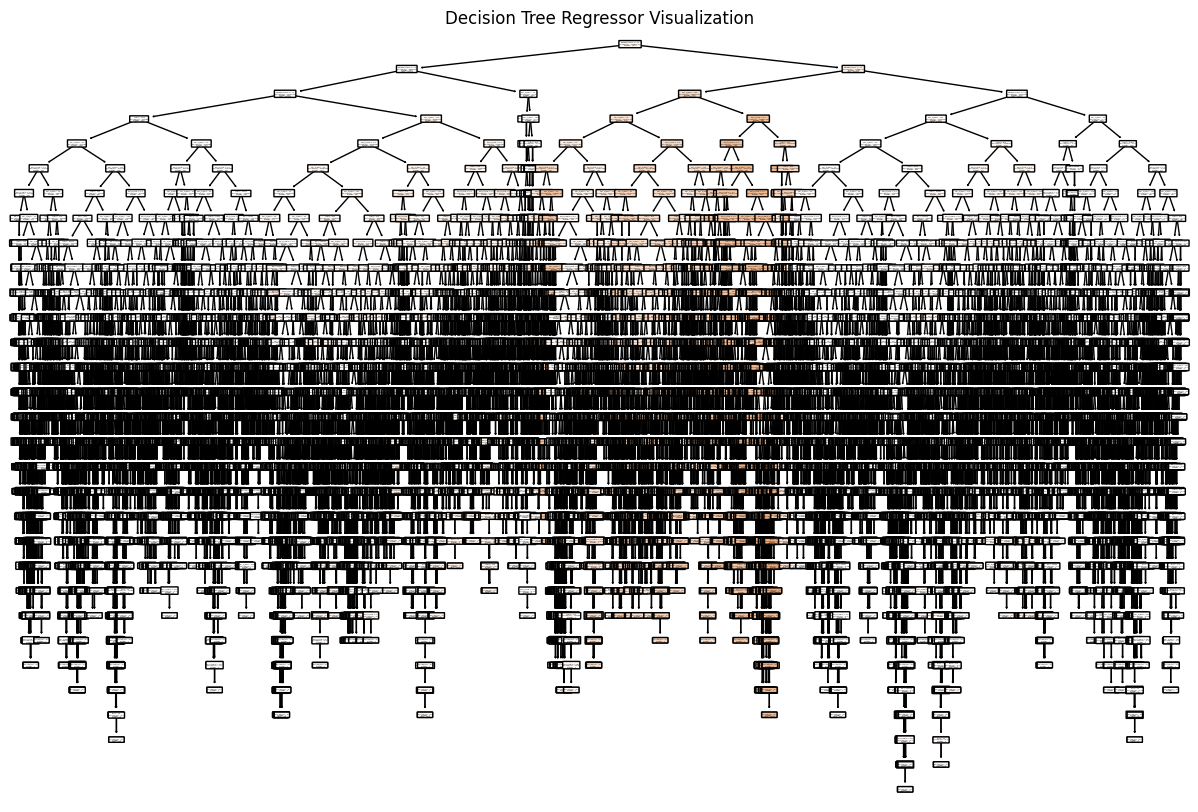

In [143]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(regressor, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

Mean Squared Error: 28147.42238445894
R-squared (R2) Score: 0.9742651418817335


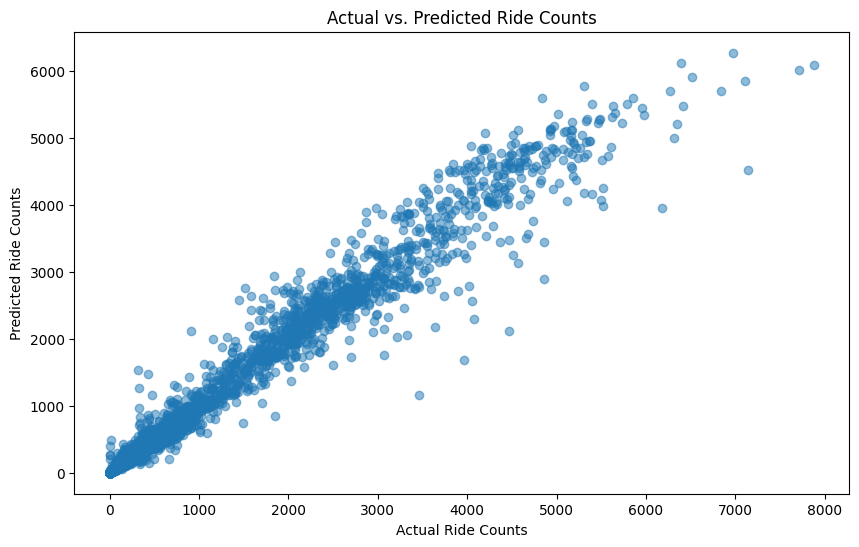

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor (you can choose a different model)
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

# Visualization (example)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ride Counts")
plt.ylabel("Predicted Ride Counts")
plt.title("Actual vs. Predicted Ride Counts")
plt.show()

## Gradient Boosting Regressor

Mean Squared Error (MSE): 128711.03942574964
R-squared (R2) Score: 0.8823210064270354


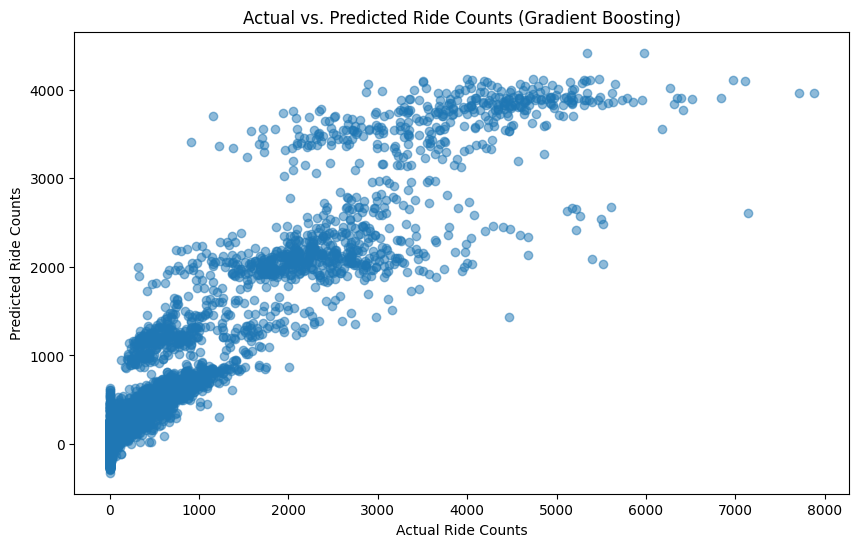

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state=0)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Visualization (relationship between predicted and test values)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ride Counts")
plt.ylabel("Predicted Ride Counts")
plt.title("Actual vs. Predicted Ride Counts (Gradient Boosting)")
plt.show()

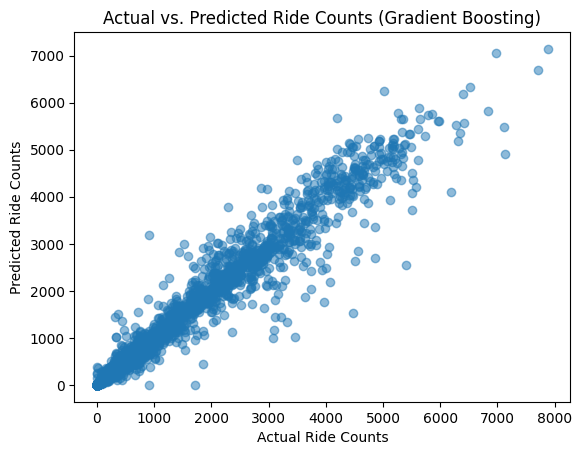

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

# Define your custom hyperparameters in a dictionary
params = {
    'n_estimators': 500,
    'max_depth': 14,
    'min_samples_split': 2,
    'learning_rate': 0.01,

}

# Initialize the GradientBoostingRegressor with custom hyperparameters
regressor = GradientBoostingRegressor(random_state=0, **params)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Visualization code (same as before)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ride Counts")
plt.ylabel("Predicted Ride Counts")
plt.title("Actual vs. Predicted Ride Counts (Gradient Boosting)")
plt.show()